# Demo - SciKit Learn
* popular Python library providing efficient implementation of a large number of machine learning algorithms
* purposely designed to be clean and uniform across tools
* consistent data representation and common interface

# SciKit Learn Data Representation
<img style="height: 400px;" src="images/scikit-learn-data.png">

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

np.random.seed(5)

# load the iris dataset that ships with scikit learn
iris = datasets.load_iris()
dat = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                   columns= iris['feature_names'] + ['target'])
dat.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [2]:
# Set up the feature matrix
X_iris = dat.drop('target', axis=1)
X_iris.shape

(150, 4)

In [3]:
# Set up the target vector
y_iris = iris['target']
y_iris.shape

(150,)

# scikit-learn Objects
* "All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces: an estimator interface for building and fitting models, a predictor interface for making predictions and a transformer interface for converting data."
<br>__*API design for machine learning software:
experiences from the scikit-learn project*__ (https://arxiv.org/pdf/1309.0238.pdf)

# Estimator API
* Driven by a set of principles documented in the above paper:
  * Consistency
  * Allow Inspection
  * Limited object hierarchies
  * Composition
  * Sensible defaults

# General Workflow
* Choose a model
* Choose model hyperparameters
* Arrange data into a features matrix and target vector
* Fit the model to the data with the __`fit()`__ method
* Apply the model to test data (__`predict()`__ or __`transform()`__)

In [4]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)

# Let's split out dataset into training and test, in order to 
# see how well our model actually does.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [5]:
X_test.shape

(38, 4)

In [11]:
# Let's check the test data, one by one, and see how
# many we got right.
correct = 0

for i in range(X_test.shape[0]):
    row = X_test.iloc[i, :]
    pred = tree_clf.predict(row[np.newaxis, :])
    print('prediction for', row[np.newaxis, :], 
          'is', pred[0], 'actual is', y_test[i], end='')
    if pred[0] == y_test[i]:
        correct += 1
    else:
        print('*', end='')
    print()
print(correct / X_test.shape[0])

prediction for [[5.  2.  3.5 1. ]] is 1 actual is 1
prediction for [[5.7 4.4 1.5 0.4]] is 0 actual is 0
prediction for [[5.2 3.5 1.5 0.2]] is 0 actual is 0
prediction for [[5.7 2.6 3.5 1. ]] is 1 actual is 1
prediction for [[6.4 2.9 4.3 1.3]] is 1 actual is 1
prediction for [[4.6 3.6 1.  0.2]] is 0 actual is 0
prediction for [[5.7 2.9 4.2 1.3]] is 1 actual is 1
prediction for [[6.3 2.9 5.6 1.8]] is 2 actual is 2
prediction for [[6.7 3.1 5.6 2.4]] is 2 actual is 2
prediction for [[6.8 3.  5.5 2.1]] is 2 actual is 2
prediction for [[7.4 2.8 6.1 1.9]] is 2 actual is 2
prediction for [[5.9 3.2 4.8 1.8]] is 2 actual is 1*
prediction for [[5.7 2.8 4.1 1.3]] is 1 actual is 1
prediction for [[4.7 3.2 1.3 0.2]] is 0 actual is 0
prediction for [[5.8 2.7 3.9 1.2]] is 1 actual is 1
prediction for [[5.5 4.2 1.4 0.2]] is 0 actual is 0
prediction for [[7.2 3.2 6.  1.8]] is 2 actual is 2
prediction for [[5.1 3.8 1.5 0.3]] is 0 actual is 0
prediction for [[6.  2.7 5.1 1.6]] is 2 actual is 1*
prediction

In [6]:
tree_clf.score(X_test, y_test)

0.9210526315789473

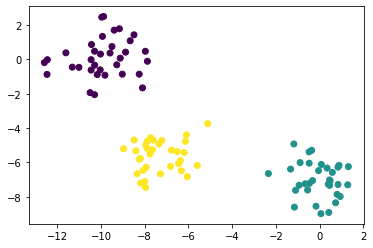

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# create 100 random data points in 3 isotropic (uniform in all dimensions) blobs
X, y = make_blobs(random_state=9)
plt.scatter(X[:, 0], X[:, 1], c=y);

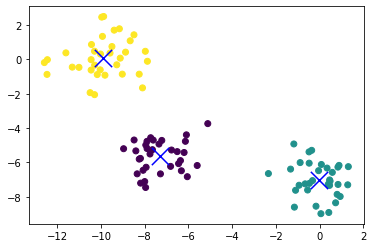

In [8]:
# Now let's do a K-means clustering...
# Since we made 3 blobs, the algorithm should do well with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
centers = kmeans.cluster_centers_
# mark the centers of each cluster, as determined by the K-means algorithm
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=300, marker='x');

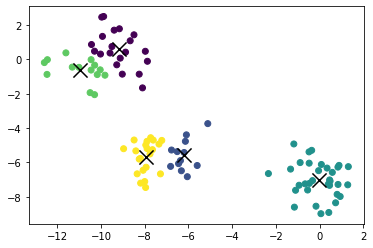

In [9]:
# let's try it with 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='x');